Activation Function: A function we applied to 
the neurons in a layer during prediction.
A function that takes a number and returns another.
There's an infinite number of functions out there, but a good activation function follows some contraints:

**_First constraint:
it must be continuous and infinite in domain_**.
A function **f** is continuous when for every value _c_ in its domain, $f(c)$ is defined, and as x approaches c, $f(x) = f(c)$ 
$$\lim_{x\to\c} f(x) = f(c)$$

Also, simply put, its graph is an unbroken curve, with no jumps, 
holes or vertical asymptotes in its domain. There's no input x for which we can't compute an output y.

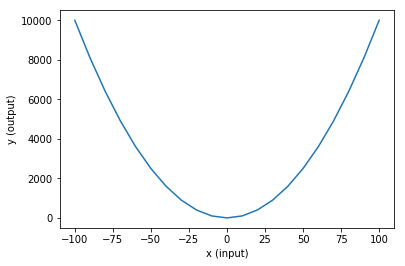

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def continuous_function(x):
    return x * x;

x = range(-100, 101, 10);
y = zip([continuous_function(value) for value in x]);

plt.plot(list(x), list(y));
plt.ylabel('y (output)');
plt.xlabel('x (input)');

**Second Constraint: Good activation functions are monotonic. 
Never changing direction i.e. always increasing or always decreasing**.

This constraint is not technically a requirement. Unlike functions that have missing values(non-continuous), we can optimize functions that aren't monotonic.

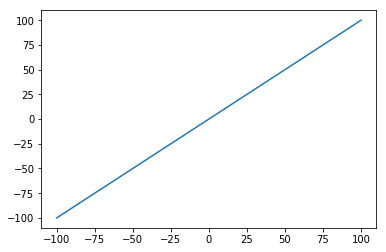

In [43]:
def monotonic_function(value):
    return value;

y = zip([monotonic_function(value) for value in x]);

plt.plot(list(x), list(y));

#The previous function i.e. y = x*x, isn't monotonic for
#two different values of x can generate the same y. It changes direction.

for non-monotonic functions, consider the implication of having 
multiple 'perfect' configuration of weights to get to the same
specific output. We are likely to find the answer if it can be found in multiple places. In the other hand, we no longer have a correct direction to move our weights to reduce the error for, theoretically, either direction would do.

**Third Constraint: 
Good activation functions are nonlinear(i.e. they squiggle and turn).**

The secret sauce in sometimes correlation:
Selectively correlate to input neurons such that a quite negative
value from one input could reduce how much a neuron correlated with any input at all(by simply forcing the neuron to drop to zero in the case of 'relu'). Curved functions facilitate this.

When we have 'straight line' functions(i.e. linear functions) we simply scale the weighted average coming in. Simply scaling something doesn't affect how correlated a neuron is to its inputs. It just makes the collective correlation that is represented louder or softer.

**Given a neuron with an activation function, we want 0ne incoming signal to be able to increase or decrease how correlated a neuron is to all of the other incoming signals**;

Linear function:

In [ ]:
#there's no need to account for derivatives at linear functions,
#for it is simply scaling the weighted average coming in. 1:1;
linear = lambda x: 2 * x + 5

_**Relu activation function:**_

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


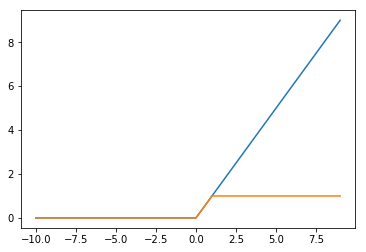

In [3]:
def relu(input):
    return (input > 0) * input;

def relu2deriv(output):
    return (output > 0);

input = [ value for value in range(-10, 10) ];
output = [ relu(value) for value in input ]
deriv = [ relu2deriv(value) for value in output ]
print(output);
plt.plot(input, output);
plt.plot(input, deriv);

**Forth Constraint: 
Good activaton functions( and their derivatives ) 
should be efficiently computable**

This one is easy. One is going to call this function a LOT
( sometimes billions of times), so one does not want it to be slow.

In fact, most recent activation functions became popular due to their effortless computation at the expense of its expressiveness( 'relu' is a good example of it).

**Standard hidden layer activation functions.**

**_Sigmoid: The bread and butter_**

$$\sigma(sigma) = \frac{1}{1+e^{-x}}$$

Generate values between zero and one. Can, and most of the time is used, in the output layer, as a way to get probabilities out of each neuron. 'Varying degrees of positive correlation'.

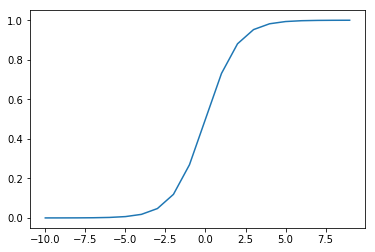

In [6]:
sigmoid = lambda input: 1/(1+np.exp(-input));
sigmoid2deriv = lambda output: output * (1 - output);

input = range(-10, 10);
output = [ sigmoid(value) for value in input ];
deriv = [ sigmoid2deriv(value) for value in output ] 

plt.plot(input, output);

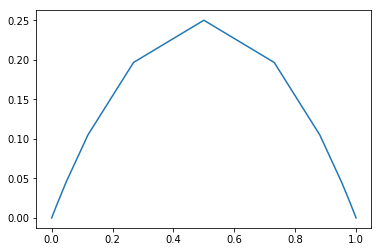

In [5]:
plt.plot(output, deriv);

**Tanh(hyperbolic tangent)**: generate values between -1 and 1; It's great for hidden layers as it can throw some negative correlation and help us modeling our selective correlation.

$sinh x = \frac{e^x - e^{-x}}{2}$

$$cosh x = \frac{e^x + e^{-x}}{2}$$

$$tanh x = \frac{sinhx}{coshx} = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

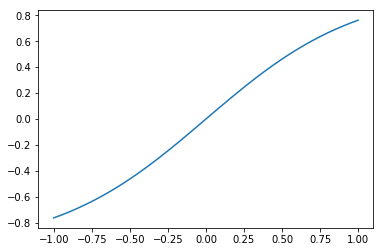

In [8]:
def tanh(input):
    return sinh(input) / cosh(input)
def sinh(x):
    return (np.exp(x) - np.exp(-x)) / 2
def cosh(x):
    return (np.exp(x) + np.exp(-x)) / 2

def tanh2deriv(output):
    return 1 - output ** 2
    
input = np.arange(-1, 1, .0005);
output = [ tanh(value) for value in input ]
deriv = [ tanh2deriv(value) for value in output ]

plt.plot(input, output);
#plt.plot(input, np.tanh(input)); built-in tanh;

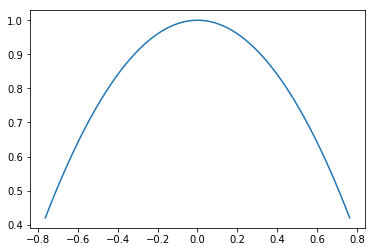

In [9]:
plt.plot(output, deriv);

  9.3 Standard output layer activation functions

Chosen based on output layer.

Three major types of output layer:

Raw data values(No activation function): output values are outside of tanh or sigmoid(i.e. -1 to 1), so there's no need to use them. 
Trask states, in such cases, that he would personally opt to train the network without an activation function on the output at all. e.g. Predicting temperature based on surroundings. 

Unrelated Yes/No probabilities(sigmoid):
Multiple binary probabilities in the same network.
An example of it is our 'Multiple inputs and outputs' network, back at chapter 5;
We had whether the team would win, whether there would be injuries and the morale of the team(happy or sad);
Even though those predictions are separate, for hidden layers, perfectly predicting one could mean increased chances of getting the other right.


Which one probabilities(Softmax):
The most common case - predicting a single label out of many.
softmax - The more likely it's one of the labels, the less likely it's any of the others.
Where softmax asks 'which digit seems the best fit for this input?'
sigmoid says 'you better believe it's only digit nine and doesn't have anything in common with other MNIST digits'.
When we use sigmoid instead of softmax in our MNIST network we are bound to, even if we predicted perfectly(0 for everything except our label), we still end up backpropagating error, because for sigmoid it's not only about predicting the highest value for the true label, but predicting 0 everywhere else.

In [ ]:
e.g.
    should predict nine:
    raw_dot_product_values = (0, 0, 0, 0, 0, 0, 0, 0, 0, 1);
    sigmoid(raw_dot_product_values) => (.5, .5 ... .5, .99)
    #We'll backpropagate this thing, configuring an huge weight update, even though we already predicted perfectly.
    sigmoid_msquared_error => (.25, .25, .25 ... .25, 0); 
    softmax(raw_dot_product_values) => raw_dot_product_values;

Softmax : raises each input value exponentially and then divides by the layers sum. 

The higher the network predicts one value, the lower it predicts all others. That's the cool thing about it, given that it increases what is called 'sharpness of attenuation' - It encourages the output to predict with a very high probability.

In [ ]:
def softmax(input):
    exponential_raise = np.exp(input)
    return exponential_raise / np.sum(exponential_raise);

def softmax2deriv(output, binary_goal_pred):
    tmp = output - binary_goal_pred;
    return tmp / len(binary_goal_pred)

input = range(-10, 10);
output = softmax(list(input));
true = np.zeros(output.shape)
true[16] = 1;
deriv = softmax2deriv(output, true);

plt.plot(input, output);
plt.plot(output, deriv);

In [ ]:
def fun1(x):
    return 10*x

def fun2(x):
    return 5*x+20

MAX_X = 100# A maximum value for x goes here 
x = range(MAX_X);

y1,y2 = zip(*[ (fun1(val), fun2(val)) for val in range(MAX_X) ])
plt.plot(x, y1)
plt.plot(x, y2)
plt.ylabel('some numbers')
plt.show()

In [ ]:
The slope of relu for positive numbers is 1. For negative numbers is 0.
modifying the input(lingo: the input to a layer refers to the value before the nonlinearity) to this function will have a 1:1
effect if it was predicting positively and 0:1(none) effect if it was predicting negatively.
Therefore, the slope of relu is a measure of how much 
the output of relu will change given a change in it's input.